In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [98]:
df =pd.read_csv('GC_content_SGD.csv')
df.columns = np.append('locus',df.columns[1:].values)
df.set_index(['locus'], inplace=True)

In [102]:
df2 = df.ix[:,12::2]

for i in range(len(df2.iloc[0])):
    df2.ix[:,i] = df2.ix[:,i]/(i+1)

In [103]:
# In the entire yeast genome
df3 = {'A':3730181.0, 'C':2313714.0, 'G':2309288.0, 'T':3718149.0}
df3.values()
print '{:.2f}% GC the whole yeast genome '.format((df3['G']+df3['C'])/np.sum(df3.values()))

0.38% GC the whole yeast genome 


GC_tss-100    34.479633
GC_tss-200    35.588718
GC_tss-300    36.342859
GC_tss-400    37.042920
GC_tss-500    37.556281
GC_tss-600    37.896531
dtype: float64   GC_tss-100    16.705650
GC_tss-200    14.013911
GC_tss-300    12.780536
GC_tss-400    11.729789
GC_tss-500    10.907102
GC_tss-600    10.253346
dtype: float64   GC_tss-100    60.000000
GC_tss-200    60.500000
GC_tss-300    60.333333
GC_tss-400    60.500000
GC_tss-500    60.600000
GC_tss-600    59.333333
dtype: float64   GC_tss-100    14.000000
GC_tss-200    19.500000
GC_tss-300    20.000000
GC_tss-400    22.500000
GC_tss-500    24.600000
GC_tss-600    25.666667
dtype: float64


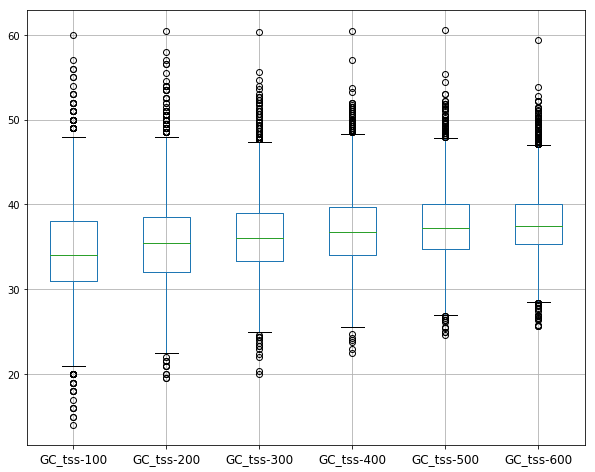

In [104]:
plt.figure(figsize=(10,8))
df2.boxplot(fontsize=12)
print np.mean(df2)," ",np.std(df2)*100/np.mean(df2)," ",np.max(df2)," ",np.min(df2)

en 100bp el GC content es menor que en el resto del genoma. std es mayor en 100bp y se va achicando cuanto mas bases contamos desde tss o start. Hay differentes grupos de genes con respecto a GC content de las 100 primeras bases. voy a correr sklearn para buscar clusters de genes con diff. GC content en las 100bp.

In [105]:
from sklearn.cluster import KMeans
from sklearn import metrics

X = df2['GC_tss-100'].as_matrix()
Y = X.reshape(-1,1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)

In [106]:
df['GC_cluster'] = kmeans.labels_

In [112]:
#coact = pd.read_csv('saga_vs_tfiid.csv')
coact = []
for i in open('saga_vs_tfiid.csv'):
    coact.append(i.strip().split(','))
coact = pd.DataFrame(coact)
coact.columns = coact.iloc[0]
coact.drop(coact.index[[0]], inplace=True)
coact.set_index('Locus', inplace=True)

In [113]:
full_df = pd.concat([df,coact], axis=1)

In [145]:
full_df.loc[full_df['SAGA/TFIID']=='TFIID-dominated','SAGA/TFIID']=1 
full_df.loc[full_df['SAGA/TFIID']=='SAGA-dominated','SAGA/TFIID']=0
full_df = full_df[(full_df['SAGA/TFIID']==1) | (full_df['SAGA/TFIID']==0)]
full_df = full_df.dropna()

In [166]:
#np.corrcoef(np.as_matrix(full_df[['GC_cluster','SAGA/TFIID']]))
np.corrcoef(np.asmatrix(full_df['GC_cluster']).astype(int),np.asmatrix(full_df['SAGA/TFIID']).astype(int))


array([[ 1.        , -0.02565857],
       [-0.02565857,  1.        ]])

Basically, there is no correlation AT ALL between CoActivators and GC content of these 100bp.